<a href="https://colab.research.google.com/github/Abdul-ur-Rehman-Butt/2022-SE-27_LAB_TASKS_ML/blob/main/OEL_ML_2022_SE_27___02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA

In [ ]:
# Load the MNIST dataset
train_df = pd.read_csv('/content/mnist_train.csv')
test_df = pd.read_csv('/content/mnist_test.csv')

In [ ]:
# Check the structure
print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)


X_train = train_df.iloc[:, :-1]  # Features
y_train = train_df.iloc[:, -1]   # Labels

X_test = test_df.iloc[:, :-1]    # Features
y_test = test_df.iloc[:, -1]     # Labels

Training Data Shape: (60000, 785)
Testing Data Shape: (10000, 785)


In [ ]:
# Standardize the data before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce features
pca = PCA(n_components=6)  # Change for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Show variance explained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427 ]


In [ ]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

# Train ANN model
ann = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=500, random_state=42)
ann.fit(X_train_pca, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)

In [ ]:
models = {"KNN": knn, "Logistic Regression": log_reg, "ANN": ann}

for name, model in models.items():
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Model: {name}")
    print(f"Accuracy: {acc:.4f}")




 Model: KNN
Accuracy: 0.8348

 Model: Logistic Regression
Accuracy: 0.7389

 Model: ANN
Accuracy: 0.8066


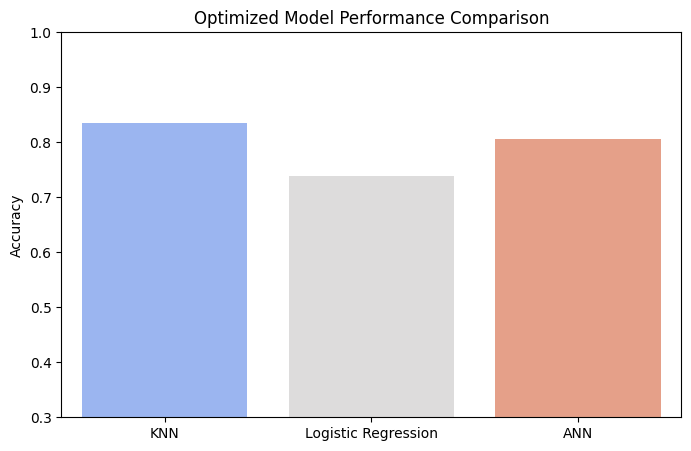

In [ ]:

acc_ann = 0.8066
acc_knn = 0.8348
acc_lr = 0.7389

models_tuned = ["KNN", "Logistic Regression", "ANN"]
accuracies_tuned = [acc_knn, acc_lr, acc_ann]  # List of numerical values

plt.figure(figsize=(8, 5))
sns.barplot(x=models_tuned, y=accuracies_tuned, palette="coolwarm")
plt.ylim(0.3, 1.0)  # Accuracy range
plt.ylabel("Accuracy")
plt.title("Optimized Model Performance Comparison")
plt.show()